<a href="https://colab.research.google.com/github/AnjanaAbY/MyDoodle/blob/main/ML_Regression_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Insurance Claims Charges Prediction

Download dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2023-11-28 09:12:59--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  54.32K  --.-KB/s    in 0.01s   

2023-11-28 09:12:59 (4.11 MB/s) - ‘insurance.csv.2’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [ ]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Read the Data
ds=pd.read_csv("insurance.csv")

##STEP-2:Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive stats
print("description:\n",ds.describe())

description:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
# Null check
print("null values\n:",ds.isnull().sum())

null values
: age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Visulizations

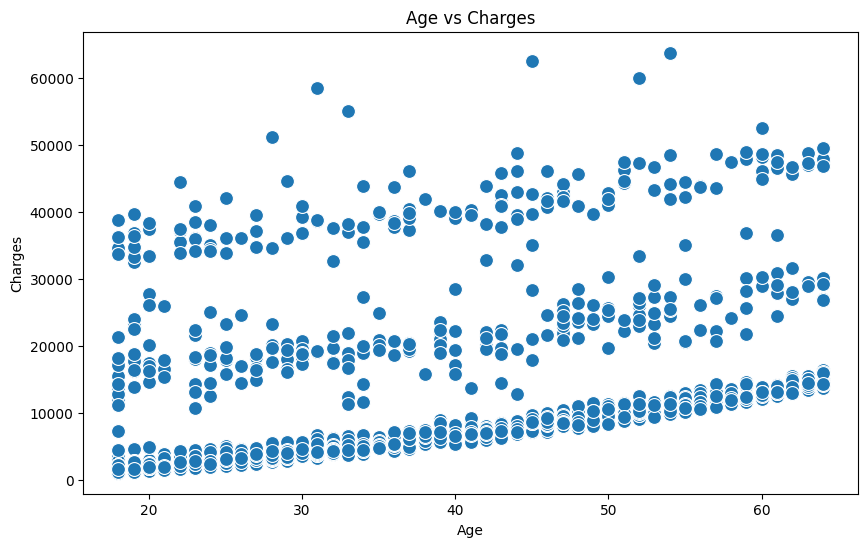

In [ ]:
# Age vs Charges
# the more the age the more will be insurance charge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges',data=ds,s=100)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

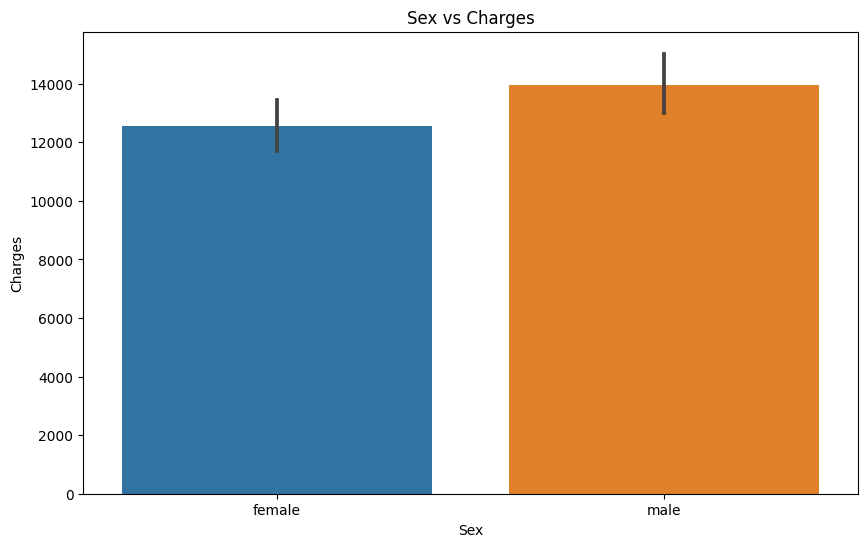

In [ ]:
# sex vs charges
# males insurance charges more than females.
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='charges', data=ds,)
plt.title('Sex vs Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

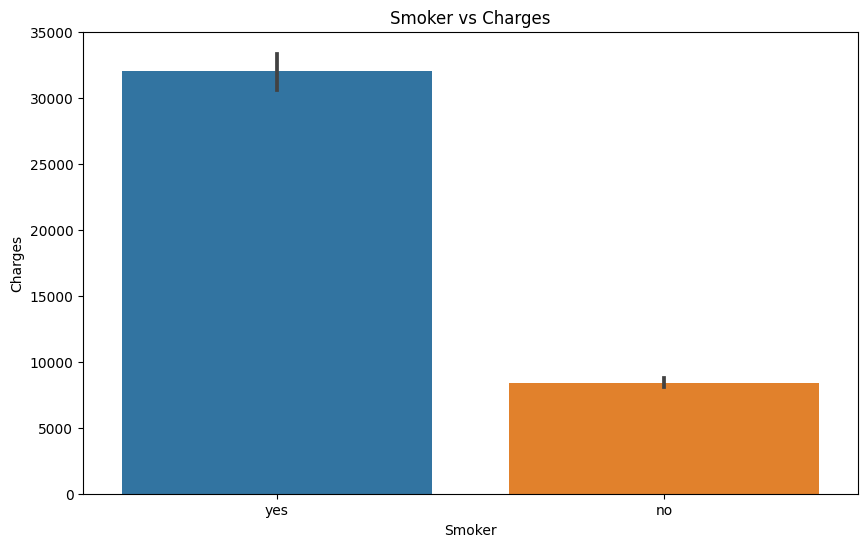

In [ ]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='charges', data=ds)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

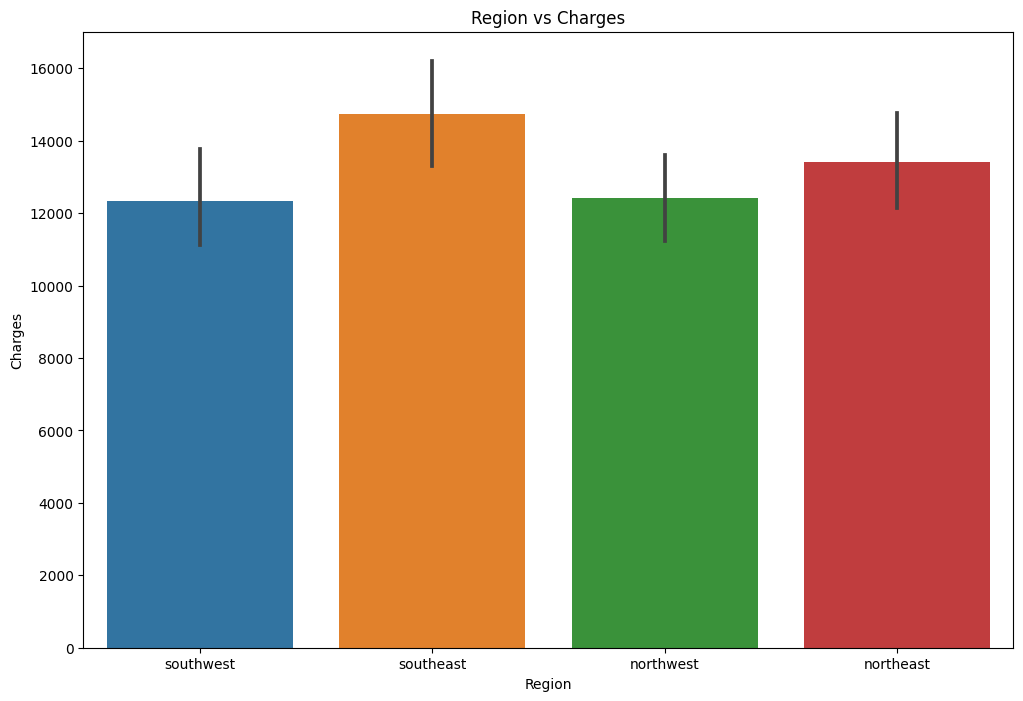

In [ ]:
# region vs charges
# region actually does not play any role in determining the insurance charges
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='charges', data=ds)
plt.title('Region vs Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

<ipython-input-64-d1791f7bf3df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=ds.corr()


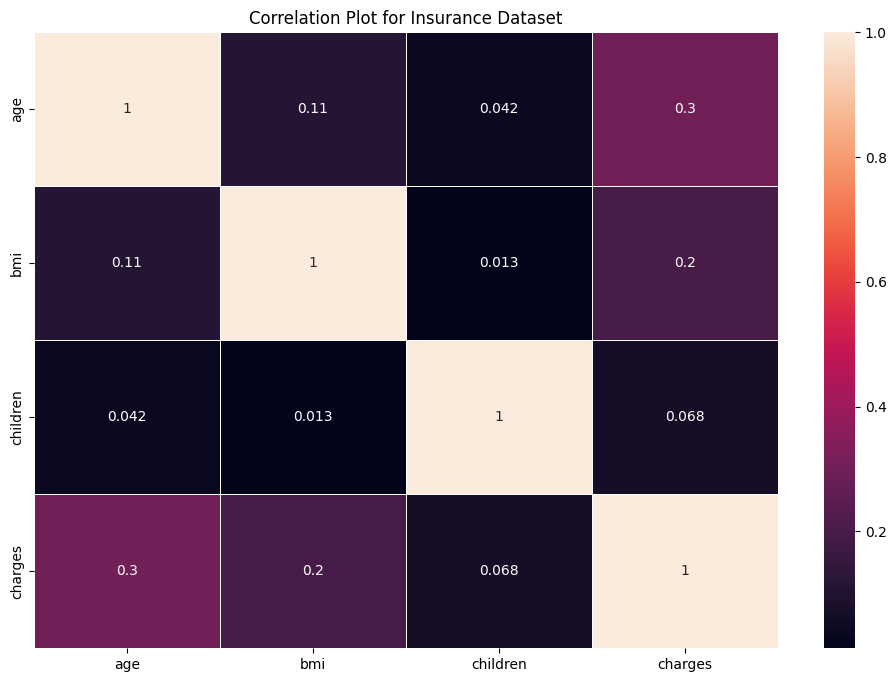

In [ ]:
# plotting the correlation plot for the dataset
correlation=ds.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, linewidths=.5)
plt.title('Correlation Plot for Insurance Dataset')
plt.show()


##STEP-3:Data Preprocessing / Clean the Data


In [ ]:
# removing unnecassary columns from the dataset
ds=ds.drop('region',axis=1)

In [ ]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
ds['sex_encoding']=label_encoder.fit_transform(ds['sex'])
ds['smoker_encoding']=label_encoder.fit_transform(ds['smoker'])
print(ds)


      age     sex     bmi  children smoker      charges  sex_encoding  \
0      19  female  27.900         0    yes  16884.92400             0   
1      18    male  33.770         1     no   1725.55230             1   
2      28    male  33.000         3     no   4449.46200             1   
3      33    male  22.705         0     no  21984.47061             1   
4      32    male  28.880         0     no   3866.85520             1   
...   ...     ...     ...       ...    ...          ...           ...   
1333   50    male  30.970         3     no  10600.54830             1   
1334   18  female  31.920         0     no   2205.98080             0   
1335   18  female  36.850         0     no   1629.83350             0   
1336   21  female  25.800         0     no   2007.94500             0   
1337   61  female  29.070         0    yes  29141.36030             0   

      smoker_encoding  
0                   1  
1                   0  
2                   0  
3                   0  
4  

In [ ]:
#Selecting Independent (Features) & Dependent(Target) variables
xcols=[col for col in ds.columns if col not in ['charges','sex','smoker']]
x=ds[xcols]
y=ds['charges']

Splitting the dataset into the Training set and Test set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 33979257.05080821
Root Mean Squared Error: 5829.17293025419
R-squared Score: 0.7811302113434095


##Support Vector Machine

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 166462302.70997378
Root Mean Squared Error: 12902.02707755544
R-squared Score: -0.07222971234901521


##Decision Tree

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 43579367.62333527
Root Mean Squared Error: 6601.467081136985
R-squared Score: 0.7192932450746337


##Random Forest

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the root mean squared error
# Calculating the r2 score
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 22224660.74285721
Root Mean Squared Error: 4714.303844986788
R-squared Score: 0.8568448158686895


Compare and evaluate the Model results and find the best model

In [ ]:
Random forest has the highest MSE and RMSE compared to other models which indicates the better performance
Also random forest has the highest R2 squared value.As R-squared measures how well the model explains the variance in the data, a higher R-squared value signifies a better fit to the data.
So the best model will be Random Forest.